## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations

## Due: November 10, 2024 by 11:59 PM
### <span style="color: red">Enrique Antunano</span>

Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lectures 5 and 6. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of differential equations. To get the full story, an indispensable book is the one by Hirsch and Smale: https://www.amazon.com/Differential-Equations-Dynamical-Systems-Introduction/dp/0123820103
- The material covered here in particular comes from the beginnings of Chapters 1, 2, 3, 3, 6, 12, and 14.

In [1]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with:
- one term,
- two terms,
- three terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the
approximations get better and better.

In [2]:
# Declare sin(x) formula
x,y,n = sm.symbols("x,y,n")
f   =   sm.sin(x)       # zeroth term
df  =   sm.diff(f,x)    # one term
d2f =   sm.diff(df,x)   # second term
d3f =   sm.diff(d2f,x)  # third term
d4f =   sm.diff(d3f,x)  # fourth term
d5f =   sm.diff(d4f,x)  # fifth term
d6f =   sm.diff(d5f,x)  # fifth term
# lambdify the functions to make them callable
f_lam   = sm.lambdify(x,f)
df_lam  = sm.lambdify(x,df)
d2f_lam = sm.lambdify(x,d2f)
d3f_lam = sm.lambdify(x,d3f)
d4f_lam = sm.lambdify(x,d4f)
d5f_lam = sm.lambdify(x,d5f)
d6f_lam = sm.lambdify(x,d6f)
# Continue to modify each term
term1 = (df_lam(0)*(y**n))/sm.factorial(n)  # one term
term2 = (d2f_lam(0)*(y**n))/sm.factorial(n) # second term
term3 = (d3f_lam(0)*(y**n))/sm.factorial(n) # third term
term4 = (d4f_lam(0)*(y**n))/sm.factorial(n) # fourth term
term5 = (d5f_lam(0)*(y**n))/sm.factorial(n) # fifth term
term6 = (d6f_lam(0)*(y**n))/sm.factorial(n) # fifth term

term1_lam = sm.lambdify([y,n],term1)
term2_lam = sm.lambdify([y,n],term2)
term3_lam = sm.lambdify([y,n],term3)
term4_lam = sm.lambdify([y,n],term4)
term5_lam = sm.lambdify([y,n],term5)
term6_lam = sm.lambdify([y,n],term6)

# Solve each term
one_term = f_lam(0) + (term1_lam(y,1))
one_term_lam = sm.lambdify(y,one_term)

second_term = one_term_lam(y) + term2_lam(y,2)
second_term_lam = sm.lambdify(y,second_term)

third_term = second_term_lam(y) + term3_lam(y,3)
third_term_lam = sm.lambdify(y,third_term)

fourth_term = third_term_lam(y) + term4_lam(y,4)
fourth_term_lam = sm.lambdify(y,fourth_term)

fifth_term = fourth_term_lam(y) + term5_lam(y,5)
fifth_term_lam = sm.lambdify(y,fifth_term)

sixth_term = fifth_term_lam(y) + term6_lam(y,6)
sixth_term_lam = sm.lambdify(y,sixth_term)

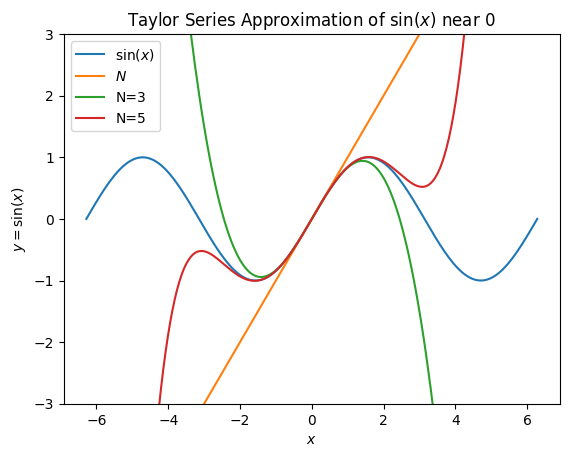

In [3]:
# Plot nth Taylor Polynomials
x = np.linspace(-2*np.pi,2*np.pi,200);
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.plot(x,x,label="$N$")
# plt.plot(x,second_term_lam(x),label="$x$ - second order term")
plt.plot(x,third_term_lam(x),label="N=3")
# plt.plot(x,fourth_term_lam(x),label="$x - x**3/3!$ - fourth order term")
plt.plot(x,fifth_term_lam(x),label="N=5")
# plt.plot(x,sixth_term_lam(x),label="$x - x**3/3! - x**5/5!$ - sixth order term")
plt.xlabel('$x$')
plt.ylabel('$y = \sin(x)$')
plt.title("Taylor Series Approximation of $\sin(x)$ near 0")
plt.ylim([-3, 3])
plt.legend();

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$.

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$?

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

2a.<br>
This problem will be done in two steps as suggested.

Evaluate the first inequality. $$1+\frac{1}{2}x-\frac{1}{8}x^2 \leq \sqrt{1+x}$$
So suppose $x > 0$ and consider the interval (0,x]. <br>
Take the Taylor approximation of the first inequality up to the first three terms and residual cubic. Take $x_0 = 0$. <br>

$$ \text{R.H.S. = } \sqrt{1+(0)} + \frac{1}{2*\sqrt{1+0}}*x - \frac{1}{4*\sqrt{(1+0)^3)}}\frac{x^2}{2!}$$
$$ = 1 + \frac{1}{2}x - \frac{1}{4}\frac{x^2}{2!}$$
$$ = 1 + \frac{1}{2}x - \frac{1}{8}x^2$$

The second order residual, $R_2(x)$, is $$|-(\frac{3(1+0)^2}{8\sqrt{(1+0)^3}^3)} * \frac{x^3}{(2+1)!})|$$
$$ = |-(-\frac{3}{8} \frac{x^3}{3!})| $$
$$ = |\frac{1}{16}x^3|$$
$$ = \frac{1}{16}x^3$$

Based on the $2^{nd}$ order Taylor approximation of $\sqrt{1+x}$, for all values of $x>0$, $1+\frac{1}{2}x-\frac{1}{8}x^2 = \sqrt{1+x}$ will always hold. $1+\frac{1}{2}x-\frac{1}{8}x^2$ approximation is a floor, the $4^{th}$ term expansion of the Taylor Approximation will add to the $1+\frac{1}{2}x-\frac{1}{8}x^2$ approximation since the third derivative of the denominator will flip the sign of the $4^{th}$ Taylor approximation term. <br>

Analyzing the cubic residual of the Taylor approximation of $\sqrt{1+x}$, it will correlate to a positive $4^{th}$ order term to the $2^{nd}$ order Taylor approximation of $\sqrt{1+x}$. Meaning the Taylor approximation of $\sqrt{1+x}$ will not be smaller than $1+\frac{1}{2}x-\frac{1}{8}x^2$ for all $x>0$.



Now, evaluate the second inequality. $$\sqrt{1+x} \leq 1+\frac{1}{2}x$$
So suppose $x > 0$ and consider the interval (0,x]. <br>
Take the Taylor approximation of the second inequality up to the second term and residual cubic. Take $x_0 = 0$. <br>
$$ \text{L.H.S. = } \sqrt{1+(0)} + \frac{1}{2*\sqrt{1+0}}*x$$
$$ = 1 + \frac{1}{2}x$$

The first order residual, $$ R_1(x) = | - \frac{1}{4*\sqrt{(1+0)^3)}}\frac{x^2}{2!} | $$
$$ = | - \frac{1}{4}\frac{x^2}{2!} |$$
$$ = | - \frac{1}{8}x^2 |$$
$$ = \frac{1}{8}x^2 $$

Analyzing the square residual of the Taylor approximation of $\sqrt{1+x}$, it will correlate to a negative $3^{rd}$ order term to the $1^{st}$ order Taylor approximation of $\sqrt{1+x}$. Meaning the Taylor approximation of $\sqrt{1+x}$ will not be larger than $1+\frac{1}{2}x$ for all $x>0$.

2b. <br> 
Find the quality of the approximation for $\sqrt{2}$ where $x=1$. 
$$ err_{\text{lower bound}}(1 + \frac{1}{2}x - \frac{1}{8}x^2) = \frac{1}{16}*(1)^3$$
$$ = \frac{3}{16}$$
$$ err_{\text{upper bound}}(1 + \frac{1}{2}x) = \frac{1}{8}*(1)^2$$
$$ = \frac{1}{8} $$

Find the quality of the approximation for $\sqrt{3}$
$$ err_{\text{lower bound}}(1 + \frac{1}{2}x - \frac{1}{8}x^2) = \frac{1}{16}*(2)^3$$
$$ = \frac{1}{4}$$
$$ err_{\text{upper bound}}(1 + \frac{1}{2}x) = \frac{1}{8}*(2)^2$$
$$ = \frac{1}{2} $$


Find $\sqrt{1+x}$ error less than $10^{-5}$


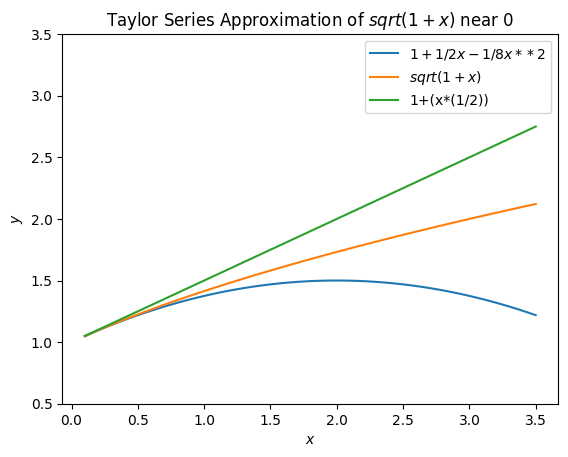

In [4]:
#2c
x = sm.symbols("x", positive=True,real=True)
# f(x) = 1+1/2x-1/8x**2
lower_bound_func = 1+((1/2)*x)-((1/8)*(x**2))
# f(x) = sqrt(1+x)
func = sm.sqrt(1+x)
# f(x) = 1+(x*(1/2))
upper_bound_func = 1+((1/2)*x)
# lambdify the three functions above
lower_bound_func_lam = sm.lambdify(x,lower_bound_func)
func_lam = sm.lambdify(x,func)
upper_bound_func_lam = sm.lambdify(x,upper_bound_func)

# # Plot nth Taylor Polynomials
x = np.linspace(0.1,3.5,100);
plt.plot(x,lower_bound_func_lam(x),label="$1+1/2x-1/8x**2$")
plt.plot(x,func_lam(x),label="$sqrt(1+x)$")
plt.plot(x,upper_bound_func_lam(x),label="1+(x*(1/2))")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Taylor Series Approximation of $sqrt(1+x)$ near 0")
plt.ylim([0.5, 3.5])
plt.legend();

### 3. Equilibria Points and Linearization

For each of the
following systems:

(i) find the equilibria,

(ii) linearize the system around each equilibrium and find the eigenvalues, and

(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\;
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} =
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

(i) <br>
<br>
a) 
$$ 
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
=
\begin{bmatrix} 
    f_1(x^{eq},u^{eq}) \\
    f_2(x^{eq},u^{eq})
\end{bmatrix}
=
\begin{bmatrix} 
    x_{2}^{2} \\
    x_{1}^{2}
\end{bmatrix}
= 0
$$
Equilibrium points,
$$
x_1^{eq} = x_2^{eq} = u^{eq} = 0
$$


b) 
$$ 
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
=
\begin{bmatrix} 
    f_1(x^{eq},u^{eq}) \\
    f_2(x^{eq},u^{eq})
\end{bmatrix}
=
\begin{bmatrix} 
    x_{1}^{2} + x_{2}^{2} \\
    x_{2}
\end{bmatrix}
= 0
$$
Equilibrium points,
$$
x_1^{eq} = x_2^{eq} = u^{eq} = 0
$$


c)
$$ 
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
=
\begin{bmatrix} 
    f_1(x^{eq},u^{eq}) \\
    f_2(x^{eq},u^{eq})
\end{bmatrix}
=
\begin{bmatrix} 
    sin(x_{2}) \\
    cos(x_{1})
\end{bmatrix}
= 0
$$
Equilibrium points,
$$
x_1^{eq} = \frac{\pi}{2} \text{, } x_2^{eq} = u^{eq} = 0
$$


(ii) <br>
<br>
a) Obtain the state-space representation of the linearized system:
$$ 
\.x = 
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
=
A
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
+ Bu
= 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2}  \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2}  
\end{bmatrix}

\begin{bmatrix} 
    {x_1}  \\
    {x_2} 
\end{bmatrix}
+
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta u}    \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta u}    
\end{bmatrix}

u
$$
Compute the Jacobian for matrices A and B by taking the partial derivative and evaluate at the equilibrium points:
$$
\frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} = 0, \quad \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2} = 2x_2 = 0
$$
$$
\frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} = 2x_1 = 0, \quad \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2} = 0
$$
$$ A = 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2}  \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2}  
\end{bmatrix}
= 
\begin{bmatrix} 
    0 \quad 0  \\
    0 \quad 0 
\end{bmatrix}
$$
$$ B = 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta u}    \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta u}    
\end{bmatrix}
= 
\begin{bmatrix} 
    0   \\
    0 
\end{bmatrix}
$$
Eigenvalues,
$$
\lambda_1 = 0, \quad \lambda_2 = 0
$$



b) Obtain the state-space representation of the linearized system:
$$ 
\.x = 
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
=
A
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
+ Bu
= 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2}  \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2}  
\end{bmatrix}

\begin{bmatrix} 
    {x_1}  \\
    {x_2} 
\end{bmatrix}
+
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta u}    \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta u}    
\end{bmatrix}

u
$$
Compute the Jacobian for matrices A and B by taking the partial derivative and evaluate at the equilibrium points:
$$
\frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} = 2x_1 = 0, \quad \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2} = 2x_2 = 0
$$
$$
\frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} = 0, \quad \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2} = 1
$$
$$ A = 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2}  \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2}  
\end{bmatrix}
= 
\begin{bmatrix} 
    0 \quad 0  \\
    0 \quad 1 
\end{bmatrix}
$$
$$ B = 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta u}    \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta u}    
\end{bmatrix}
= 
\begin{bmatrix} 
    0   \\
    0 
\end{bmatrix}
$$
Eigenvalues,
$$
\lambda_1 = 0, \quad \lambda_2 = 1
$$


c) Obtain the state-space representation of the linearized system:
$$ 
\.x = 
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
=
A
\begin{bmatrix} 
    \.{x_1}  \\
    \.{x_2} 
\end{bmatrix}
+ Bu
= 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2}  \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2}  
\end{bmatrix}

\begin{bmatrix} 
    {x_1}  \\
    {x_2} 
\end{bmatrix}
+
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta u}    \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta u}    
\end{bmatrix}

u
$$
Compute the Jacobian for matrices A and B by taking the partial derivative and evaluate at the equilibrium points:
$$
\frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} = 0, \quad \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2} = cos(x_2) = cos(0) = 1
$$
$$
\frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} = -sin(x_1) = -sin(\frac{\pi}{2}) = -(1) = -1, \quad \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2} = 0
$$
$$ A = 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_1(x^{eq},u^{eq})}{\delta x_2}  \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_1} \frac{\delta f_2(x^{eq},u^{eq})}{\delta x_2}  
\end{bmatrix}
= 
\begin{bmatrix} 
    0 \quad 1  \\
    1 \quad 0 
\end{bmatrix}
\rightarrow
RREF(A) = 
\begin{bmatrix} 
    -1 \quad 0  \\
    0 \quad 1 
\end{bmatrix}
$$
$$ B = 
\begin{bmatrix} 
    \frac{\delta f_1(x^{eq},u^{eq})}{\delta u}    \\
    \frac{\delta f_2(x^{eq},u^{eq})}{\delta u}    
\end{bmatrix}
= 
\begin{bmatrix} 
    0   \\
    0 
\end{bmatrix}
$$
Eigenvalues,
$$
\lambda_1 = -1, \quad \lambda_2 = 1
$$


iii) <br>
<br>
a) Zero eigenvalues, $\lambda_1 = 0$ and $\lambda_2 = 0$, means that the system is neutrally stable at the equilibrium, meaning it will oscillate infinitely between bounded values.
<br>
b) Zero eigenvalue $\lambda_1 = 0$ and positive eigenvalue $\lambda_2 = 1$ means that the system is unstable at the equilibrium.
<br>
c) Eigenvalues are opposite signs, negative $\lambda_1 = -1$ and positive $\lambda_2 = 1$, represents an unstable saddle point.

### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2.
For what values of $k$ is the system stable?

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$.

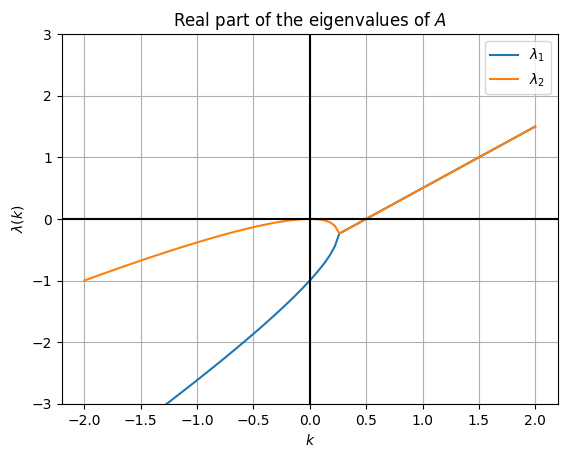

In [47]:
#4 
# Solve for eigenvalues of matrix A
k = sm.symbols("k", real=True)
A = S = sm.Matrix([[k,-k],[1,(k-1)]])
lam1, lam2 = A.eigenvals()
# lambdify the eigenvalues
re_lam1 = sm.re(lam1)
re_lam2 = sm.re(lam2)
lam1_func = sm.lambdify(k,re_lam1)
lam2_func = sm.lambdify(k,re_lam2)

# Plot the eigenvalues as a function of k; range -2 to 2
k = np.linspace(-2,2,100);
plt.plot(k,lam1_func(k),label="$\lambda_1$")
plt.plot(k,lam2_func(k),label="$\lambda_2$")
# Add x and y-axis lines at 0
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
# Label plot
plt.xlabel('$k$')
plt.ylabel('$\lambda(k)$')
plt.title("Real part of the eigenvalues of $A$")
plt.ylim([-3, 3])
plt.grid(True)
plt.legend();

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$.

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points.

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane.

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable.

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

### 7. Simulation

Using simulation and visualization, explain the behavior of the system

$$
\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}
$$

where $a=0.2$, $b=0.2$ and $c=5.7$.